In [2]:
pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 183.5 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.0 MB/s eta 0:00:0000:0100:010m
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=c4264c952626a0e2d1c02e9afa59125d49f681210a7b4fb5a55056cae31e04d5
  Stored in directory: /Users/tequan/Library/Caches/pip/wheels/4e/45/b7/0468192c2d1c3eb9becb77fa99242a5004939120651e921b3b
Successfully built scikit-fuzzy
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt



In [2]:
 #Define the input variable (temperature)
temperature = ctrl.Antecedent(np.arange(-20, 41, 1), 'temperature')

# Define the membership functions for the input variable
temperature['cold'] = fuzz.trimf(temperature.universe, [-20, -20, 10])
temperature['warm'] = fuzz.trimf(temperature.universe, [-10, 20, 40])
temperature['hot'] = fuzz.trimf(temperature.universe, [10, 40, 40])

# Define the output variable (heater setting)
heater_setting = ctrl.Consequent(np.arange(0, 101, 1), 'heater_setting')

# Define the membership functions for the output variable
heater_setting['low'] = fuzz.trimf(heater_setting.universe, [0, 0, 50])
heater_setting['high'] = fuzz.trimf(heater_setting.universe, [0, 50, 100])



In [3]:
# Define the fuzzy rules
rule1 = ctrl.Rule(temperature['cold'], heater_setting['high'])
rule2 = ctrl.Rule(temperature['warm'], heater_setting['low'])
rule3 = ctrl.Rule(temperature['hot'], heater_setting['high'])

# Define the control system and add the rules
heater_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Create a simulation
heater_sim = ctrl.ControlSystemSimulation(heater_ctrl)

# Set the input temperature
heater_sim.input['temperature'] = 25

# Compute the output heater setting
heater_sim.compute()

/Users/tequan/tensorflow/env/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


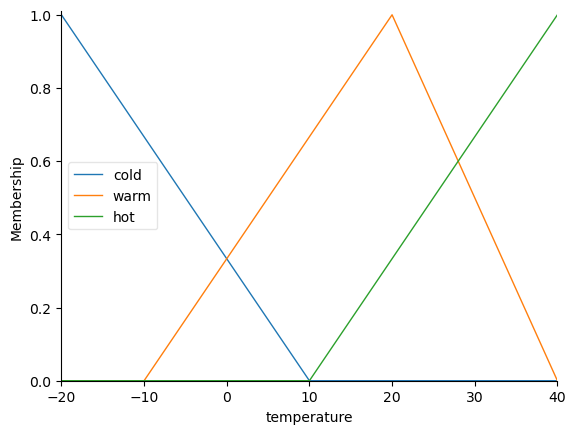

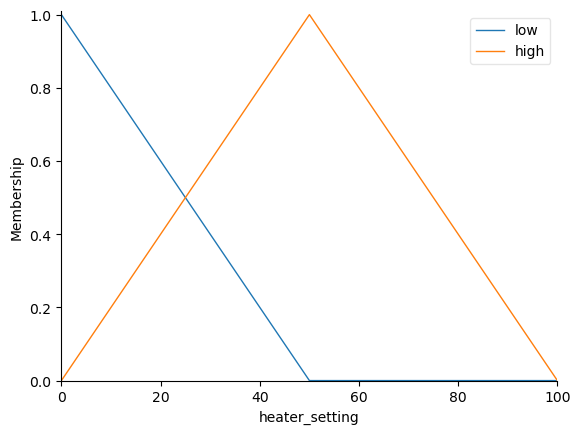

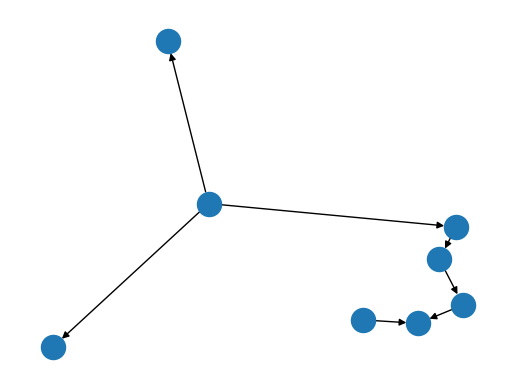

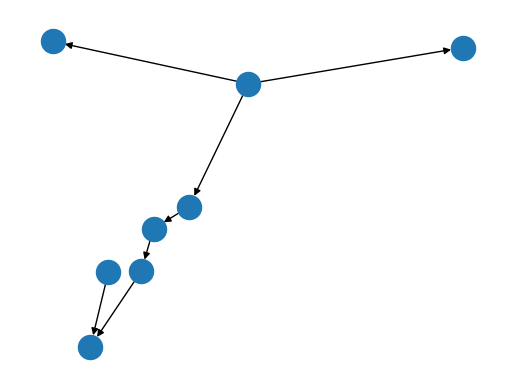

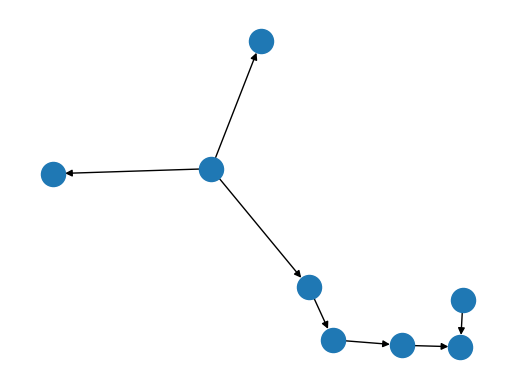

In [4]:
# Visualize the membership functions and rules
temperature.view()
heater_setting.view()
rule1.view()
rule2.view()
rule3.view()

plt.show()

In [5]:

# Get the crisp output value
heater_setting_crisp = heater_sim.output['heater_setting']

print("Heater setting:", heater_setting_crisp)


Heater setting: 40.725806451612904
